In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM , Embedding , Flatten ,Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\YASH KHADTARE\FERGUSSON\SEM 3\Final year Project\labelled_data.csv")

In [3]:
df.isnull().sum()

Unnamed: 0            0
rating_by_reviewer    0
review                0
cleaned_review        0
Sentiment             0
dtype: int64

In [4]:
df.drop("Unnamed: 0", axis = 1 , inplace = True)
df

,rating_by_reviewer,review,cleaned_review,Sentiment
0,1,second hand phone.... Delever to me...,second hand phone delever,NEGATIVE
1,1,Very very.....bad.... product,verybad product,NEGATIVE
2,1,Don't buy this phone guys ..I got a dust parti...,dont buy phone guy get dust particle camera le...,NEGATIVE
3,1,I love pixel phone But this pixel is not good ...,love pixel phone pixel good hot issue phone ha...,NEGATIVE
4,1,More heating.,heating,NEGATIVE
...,...,...,...,...
49995,5,"Futuristic phone , pretty fast , good config ,...",futuristic phone pretty fast good config dont ...,POSITIVE
49996,5,Very nice phoneMust buy,nice phone must buy,POSITIVE
49997,5,Nice product,nice product,POSITIVE
49998,5,Masha Allah very nice and beautiful mobile pho...,masha allah nice beautiful mobile phone thanku...,POSITIVE


In [5]:
# Shuffling the data rows
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)

In [6]:
df.isnull().sum()

rating_by_reviewer    0
review                0
cleaned_review        0
Sentiment             0
dtype: int64

In [7]:
df['Sentiment'].replace("POSITIVE",0,inplace = True)
df['Sentiment'].replace("NEGATIVE",1,inplace = True)
df['Sentiment'] = df['Sentiment'].astype("float32")

In [8]:
X_train, X_test , y_train , y_test = train_test_split(df['cleaned_review'] , df['Sentiment'] , test_size= 0.25 , random_state= 42)

# Tokenizing and preprocessing the data

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train , maxlen= 10)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test , maxlen= 10)

In [11]:
print("sample : \n" ,"Training : ", X_train[12] ,"\n","Testing :", X_test[12])

sample : 
 Training :  [ 0  0  0  0  0  0  0  0 30 14] 
 Testing : [  0   0  36  46  14  18  33  12 187 377]


# RNN MODEL

In [66]:
model_name =[]
Training_score =[]
Testing_score = []
Training_loss =[]
Testing_loss = []

# Model_1 (1 LSTM layer)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 10)          500       
                                                                 
 lstm_31 (LSTM)              (None, 10)                840       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
None


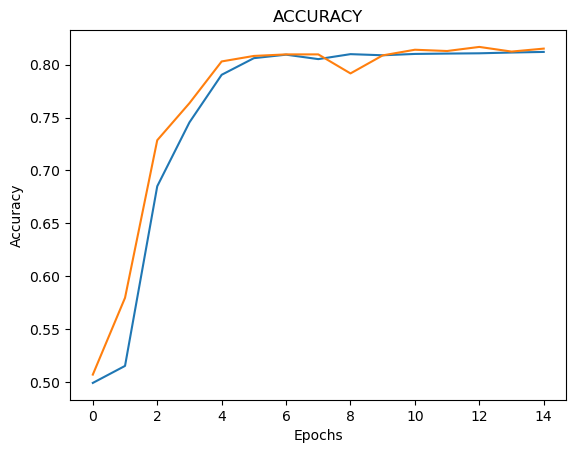

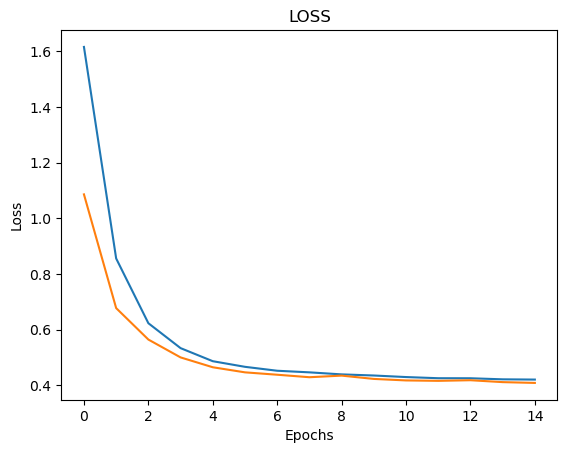

TRAINING SCORE :  0.8133866786956787
TESTING SCORE :  0.6035199761390686


In [67]:
model_1 = Sequential()

model_1.add(Embedding(50 , 10 ))
model_1.add(LSTM(10))
model_1.add(Dense(1 , activation="tanh"))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_1.summary())


history = model_1.fit(X_train , y_train , batch_size=500, epochs=15 , validation_split=0.2 , verbose = 0 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()


print("TRAINING SCORE : ",model_1.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_1.evaluate(X_test,y_test,verbose = 0)[1])

model_name.append("Model_1")
Training_score.append(model_1.evaluate(X_train,y_train,verbose = 0)[1])
Testing_score.append(model_1.evaluate(X_test,y_test,verbose = 0)[1])
Training_loss.append(model_1.evaluate(X_train,y_train,verbose = 0)[0])
Testing_loss.append(model_1.evaluate(X_test,y_test,verbose = 0)[0])

# Model_2 (2 LSTM layers)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 10)          500       
                                                                 
 lstm_32 (LSTM)              (None, None, 1000)        4044000   
                                                                 
 lstm_33 (LSTM)              (None, 500)               3002000   
                                                                 
 flatten_3 (Flatten)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 501       
                                                                 
Total params: 7,047,001
Trainable params: 7,047,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
60/60 [====================

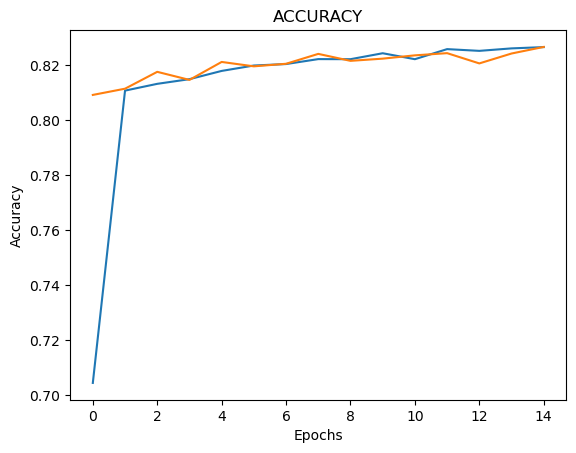

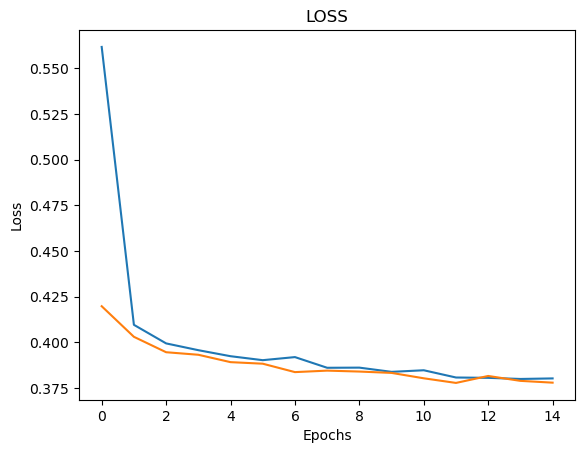

TRAINING SCORE :  0.8266133069992065
TESTING SCORE :  0.6241599917411804


In [68]:
model_2 = Sequential()

model_2.add(Embedding(50 , 10 ))
model_2.add(LSTM(100, input_shape = (10,1) , return_sequences=True))
model_2.add(LSTM(50 ) )
model_2.add(Flatten())
model_2.add(Dense(1 , activation="sigmoid"))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_2.summary())


history = model_2.fit(X_train , y_train , batch_size=500, epochs=15 , validation_split=0.2 , verbose = 1 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()

print("TRAINING SCORE : ",model_2.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_2.evaluate(X_test,y_test,verbose = 0)[1])


model_name.append("Model_2")
Training_score.append(model_2.evaluate(X_train,y_train,verbose = 0)[1])
Testing_score.append(model_2.evaluate(X_test,y_test,verbose = 0)[1])
Training_loss.append(model_2.evaluate(X_train,y_train,verbose = 0)[0])
Testing_loss.append(model_2.evaluate(X_test,y_test,verbose = 0)[0])

# Model_3 (3 LSTM layers)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 10)          500       
                                                                 
 lstm_34 (LSTM)              (None, None, 100)         44400     
                                                                 
 lstm_35 (LSTM)              (None, None, 63)          41328     
                                                                 
 lstm_36 (LSTM)              (None, 33)                12804     
                                                                 
 dense_14 (Dense)            (None, 1)                 34        
                                                                 
Total params: 99,066
Trainable params: 99,066
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
60/60 [==========================

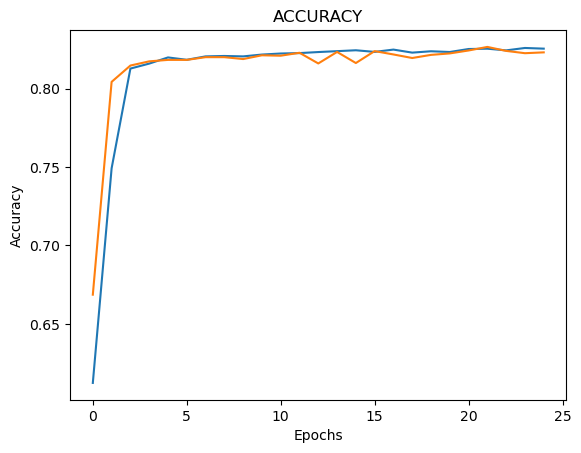

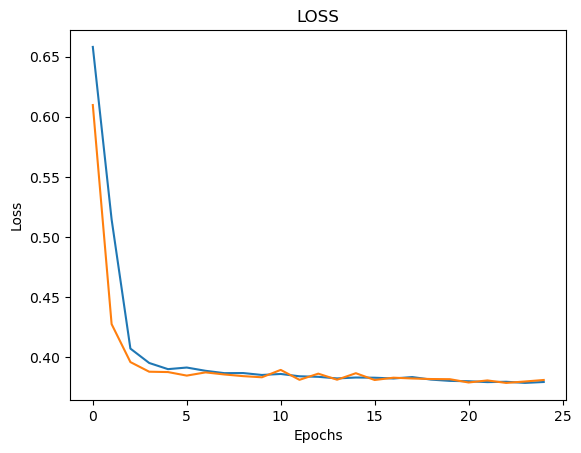

TRAINING SCORE :  0.8247466683387756
TESTING SCORE :  0.6265599727630615


In [69]:
model_3 = Sequential()

model_3.add(Embedding(50 , 10 ))
model_3.add(LSTM(100, input_shape = (10,1) , return_sequences=True))
model_3.add(LSTM(63 , return_sequences=True))
model_3.add(LSTM(33) )
model_3.add(Dense(1 , activation="sigmoid"))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_3.summary())


history = model_3.fit(X_train , y_train , batch_size=500, epochs=25 , validation_split=0.2 , verbose = 1 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()

print("TRAINING SCORE : ",model_3.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_3.evaluate(X_test,y_test,verbose = 0)[1])

model_name.append("Model_3")
Training_score.append(model_3.evaluate(X_train,y_train,verbose = 0)[1])
Testing_score.append(model_3.evaluate(X_test,y_test,verbose = 0)[1])
Training_loss.append(model_3.evaluate(X_train,y_train,verbose = 0)[0])
Testing_loss.append(model_3.evaluate(X_test,y_test,verbose = 0)[0])

# Model_4 (4 LSTM layers)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 10)          500       
                                                                 
 lstm_37 (LSTM)              (None, None, 100)         44400     
                                                                 
 lstm_38 (LSTM)              (None, None, 75)          52800     
                                                                 
 lstm_39 (LSTM)              (None, None, 50)          25200     
                                                                 
 lstm_40 (LSTM)              (None, 25)                7600      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 130,526
Trainable params: 130,526
Non-t

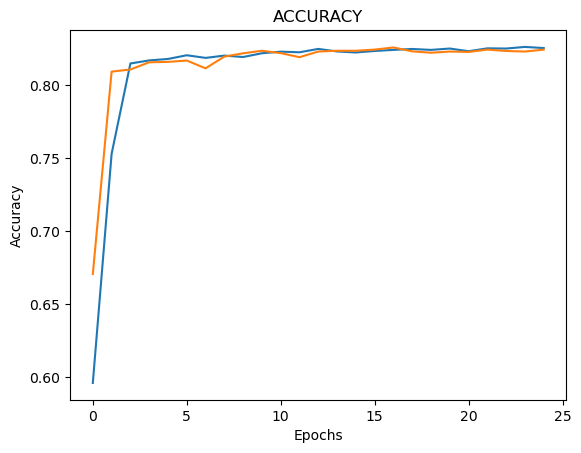

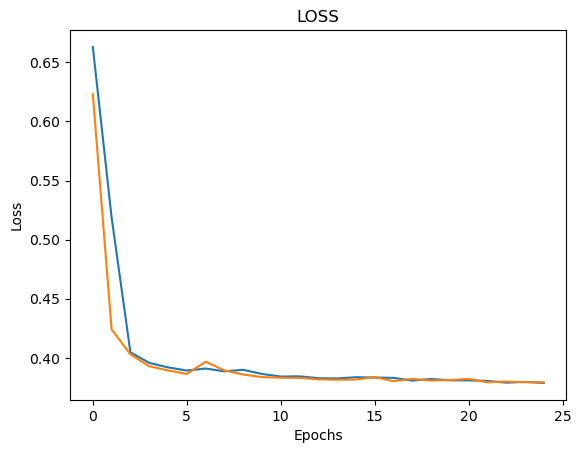

TRAINING SCORE :  0.8261600136756897
TESTING SCORE :  0.6351199746131897


In [70]:
model_4 = Sequential()

model_4.add(Embedding(50 , 10 ))
model_4.add(LSTM(100, input_shape = (10,1) , return_sequences=True))
model_4.add(LSTM(75 , return_sequences=True))
model_4.add(LSTM(50 , return_sequences=True))
model_4.add(LSTM(25) )
model_4.add(Dense(1 , activation="sigmoid"))

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_4.summary())


history = model_4.fit(X_train , y_train , batch_size=500 , epochs=25 , validation_split=0.2 , verbose = 1 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()

print("TRAINING SCORE : ",model_4.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_4.evaluate(X_test,y_test,verbose = 0)[1])

model_name.append("Model_4")
Training_score.append(model_4.evaluate(X_train,y_train,verbose = 0)[1])
Testing_score.append(model_4.evaluate(X_test,y_test,verbose = 0)[1])
Training_loss.append(model_4.evaluate(X_train,y_train,verbose = 0)[0])
Testing_loss.append(model_4.evaluate(X_test,y_test,verbose = 0)[0])

In [71]:
SCORES = pd.DataFrame(index = model_name)
SCORES['Training_score'] = Training_score
SCORES['Testing_score'] = Testing_score
SCORES['Training_loss'] = Training_loss
SCORES['Testing_loss'] = Testing_loss

In [72]:
SCORES

,Training_score,Testing_score,Training_loss,Testing_loss
Model_1,0.813387,0.60352,0.415879,0.837195
Model_2,0.826613,0.62416,0.377514,0.842732
Model_3,0.824747,0.62656,0.380083,0.811299
Model_4,0.826160,0.63512,0.377489,0.818480


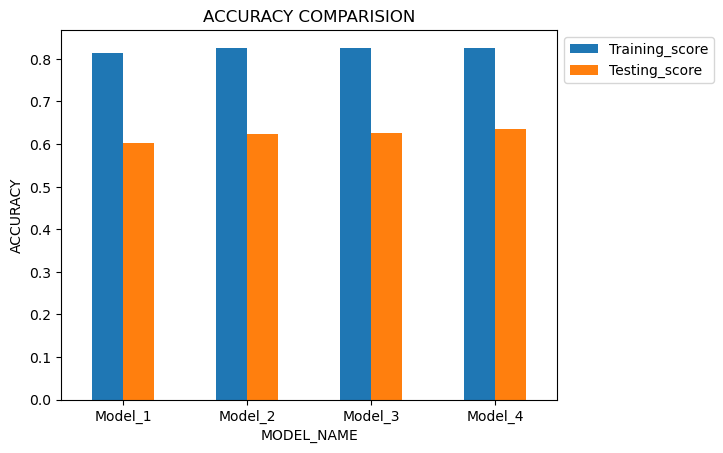

In [102]:
SCORES.iloc[:,:2].plot(kind = 'bar')
plt.xlabel("MODEL_NAME")
plt.ylabel("ACCURACY")
plt.title("ACCURACY COMPARISION")
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(rotation = 360)
plt.show()

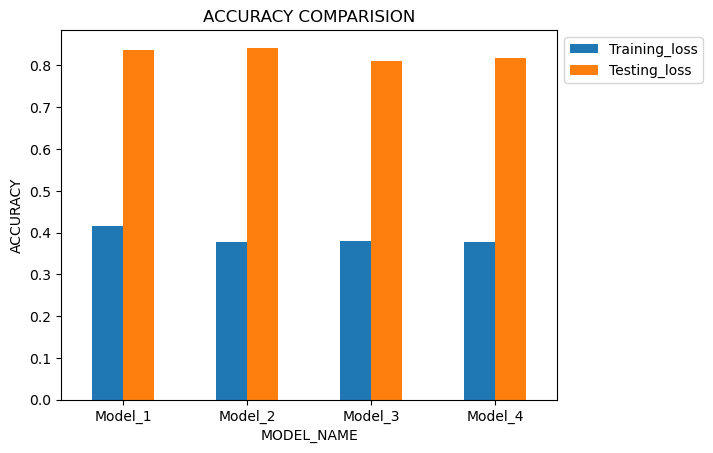

In [105]:
SCORES.iloc[:,2:].plot(kind = 'bar')
plt.xlabel("MODEL_NAME")
plt.ylabel("LOSS")
plt.title("LOSS COMPARISION")
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(rotation = 360)
plt.show()

# Conclusion
As we see we tried different models of LSTM , but still we landed in overfitting condition , that too with very less desired accuracy.

So lets move on to a better solution and try it , that is TRANSFORMERS